In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Dropout, Flatten, Dense
from keras.utils import plot_model
import tensorflow as tf

In [ ]:
!unzip "/content/Dataset.zip" -d "/content"

In [3]:
def Sobel(image):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad,abs_grad_x,abs_grad_y

def image_to_sum_array(image):
    (a,b,c) = Sobel(image)
    high = []
    for line in c:
        high.append(sum(line))
    return np.array(high)

def image_to_sobel(image):
    (a,b,c) = Sobel(image)
    return np.array(c)

In [4]:
a_list = os.listdir("Dataset/A/")
b_list = os.listdir("Dataset/B/")
c_list = os.listdir("Dataset/C/")

In [5]:
X1 = np.empty((len(a_list)+len(b_list)+len(c_list),480,640))
X2 = np.empty((len(a_list)+len(b_list)+len(c_list),480))
Y = Y = np.empty((len(a_list)+len(b_list)+len(c_list),3))

In [6]:
for i in range(len(a_list)):
    image = cv2.imread(filename="Dataset/A/"+a_list[i])
    X1[i] = image_to_sobel(image)
    X2[i] = image_to_sum_array(image)
    Y[i] = [1,0,0]

In [7]:
for i in range(len(b_list)):
    image = cv2.imread(filename="Dataset/B/"+b_list[i])
    X1[i+len(a_list)] = image_to_sobel(image)
    X2[i+len(a_list)] = image_to_sum_array(image)
    Y[i+len(a_list)] = [0,1,0]

In [8]:
for i in range(len(c_list)):
    image = cv2.imread(filename="Dataset/C/"+c_list[i])
    X1[i+len(a_list)+len(b_list)] = image_to_sobel(image)
    X2[i+len(a_list)+len(b_list)] = image_to_sum_array(image)
    Y[i+len(a_list)+len(b_list)] = [0,0,1]

In [38]:
input1 = Input((480,640,1))
input2 = Input((480,1))

tower_1 = Conv2D(64, (10, 10), padding='same', activation='relu')(input1)
tower_1 = MaxPooling2D((5, 5), strides=(1, 1), padding='same')(tower_1)
tower_1 = Conv2D(8, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((5, 5), strides=(1, 1), padding='same')(tower_1)
tower_1 = Flatten()(tower_1)
tower_1 = Dropout(0.5)(tower_1)
tower_1 = Dense(16, activation='relu')(tower_1)

tower_2 = Dense(48,activation='relu')(input2)
tower_2 = Dropout(0.2)(tower_2)
tower_2 = Dense(32,activation="relu")(tower_2)
tower_2 = Flatten()(tower_2)
tower_2 = Dense(16)(tower_2)

merged = Concatenate()([tower_1, tower_2])
merged = Flatten()(merged)
out = Dense(64, activation='relu')(merged)
out = Dense(3, activation='softmax')(out)
model = Model((input1, input2), out)

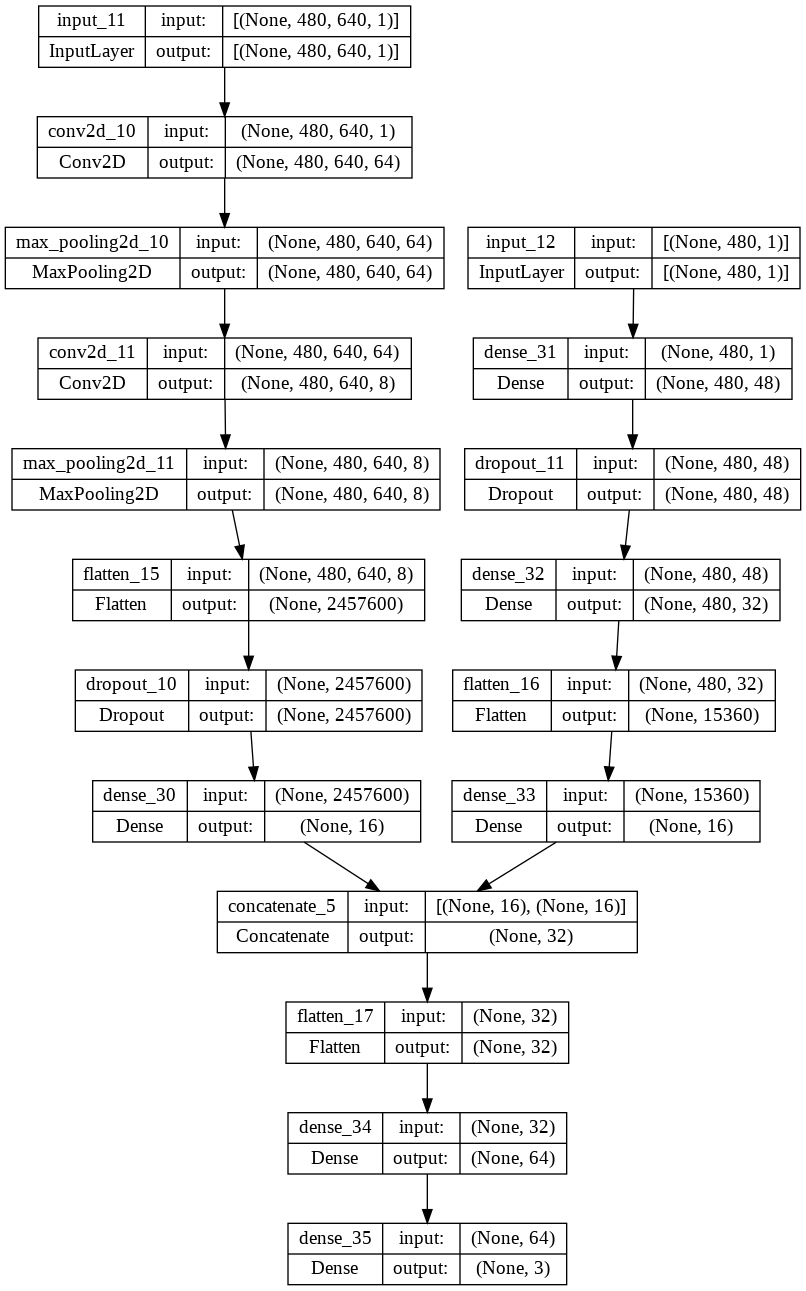

In [39]:
plot_model(model,show_shapes=True)

In [40]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 480, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 480, 640, 64  6464        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 480, 640, 64  0          ['conv2d_10[0][0]']              
 )                              )                                                           

In [41]:
model.compile(optimizer="adam",metrics = "accuracy",loss='categorical_crossentropy')

In [42]:
model.fit([X1,X2],Y,batch_size=8,epochs= 10,verbose=1)

Epoch 1/10
12/12 [==============================] - 4s 298ms/step - loss: 610.4980 - accuracy: 0.5326
Epoch 2/10
12/12 [==============================] - 4s 293ms/step - loss: 16.7622 - accuracy: 0.9348
Epoch 3/10
12/12 [==============================] - 4s 293ms/step - loss: 9.9813 - accuracy: 0.9674
Epoch 4/10
12/12 [==============================] - 4s 293ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 4s 294ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 4s 295ms/step - loss: 1.8730 - accuracy: 0.9891
Epoch 7/10
12/12 [==============================] - 4s 296ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 4s 299ms/step - loss: 2.8384 - accuracy: 0.9891
Epoch 9/10
12/12 [==============================] - 4s 299ms/step - loss: 1.3057 - accuracy: 0.9891
Epoch 10/10
12/12 [==============================] - 4s 300ms/step - loss: 0.4869 - a

In [49]:
model.save("drive/MyDrive/Model_1.h5")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Model_1.h5")

In [16]:
image = cv2.imread(filename="WIN_20221220_15_52_39_Pro.jpg")
images_list = []
images_list.append(np.array(image_to_sobel(image)))
x1 = np.asarray(images_list)
images_list = []
images_list.append(np.array(image_to_sum_array(image)))
x2 = np.asarray(images_list)
a = model.predict_on_batch([x1,x2])

In [17]:
a

array([[0., 1., 0.]], dtype=float32)

In [8]:
image_to_sum_array(image).shape

(480,)